# Polynomial Regression Using Batch Gradient Descent Optimisation

Both feature scaling and regularisation are performed

##### Step 1: Get Dataset

In [72]:
# import required packages
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# gets list of tuples containing the indices required
def generateTerms(numVariables, degree):
    variables = []
    for i in range(numVariables+1):
        variables.append(i)
 
    # compute all combinations of variables
    terms = []
    for x in itertools.combinations_with_replacement(variables, degree):
        terms.append(x)
            
    return terms

def createDataSet():
    # get input
    print("How many variables?")
    numVars = int(input())
    print("What is the max degree?")
    degree = int(input())
    
    numRows = 500
    
    # get indices
    indices = generateTerms(numVars, degree)
    
    # create initial columns
    one_column = np.ones((numRows, 1))
    data = np.random.random((numRows,numVars))
    data = np.concatenate((one_column, data), axis = 1)
    new_data = one_column
    
    # multiply the columns as dictated by the indices
    for i in indices:        
        x = data[:,i[0]]
        for j in range(1, len(i)):
            x = np.multiply(x, data[:,i[j]])
        new_data = np.concatenate((new_data, np.reshape(x, (numRows,1))), axis = 1)
        print(new_data.shape[1])
    new_data = new_data[:,2:]   # remove 1s columns that will anyway be added later
    
    # add target column to end
    target_column = np.random.random((numRows, 1))
    new_data = np.concatenate((new_data, target_column), axis = 1)
    return new_data
    

In [73]:
# create dataset
data = createDataSet()
print(data)

# print relevant metadata
m = data.shape[0]
n = data.shape[1]-1  # -1 since last column is target variable 

print("For This Dataset:")
print("m = ", m)
print("n = ", n) 

How many variables?
4
What is the max degree?
5
[(0, 0, 0, 0, 0), (0, 0, 0, 0, 1), (0, 0, 0, 0, 2), (0, 0, 0, 0, 3), (0, 0, 0, 0, 4), (0, 0, 0, 1, 1), (0, 0, 0, 1, 2), (0, 0, 0, 1, 3), (0, 0, 0, 1, 4), (0, 0, 0, 2, 2), (0, 0, 0, 2, 3), (0, 0, 0, 2, 4), (0, 0, 0, 3, 3), (0, 0, 0, 3, 4), (0, 0, 0, 4, 4), (0, 0, 1, 1, 1), (0, 0, 1, 1, 2), (0, 0, 1, 1, 3), (0, 0, 1, 1, 4), (0, 0, 1, 2, 2), (0, 0, 1, 2, 3), (0, 0, 1, 2, 4), (0, 0, 1, 3, 3), (0, 0, 1, 3, 4), (0, 0, 1, 4, 4), (0, 0, 2, 2, 2), (0, 0, 2, 2, 3), (0, 0, 2, 2, 4), (0, 0, 2, 3, 3), (0, 0, 2, 3, 4), (0, 0, 2, 4, 4), (0, 0, 3, 3, 3), (0, 0, 3, 3, 4), (0, 0, 3, 4, 4), (0, 0, 4, 4, 4), (0, 1, 1, 1, 1), (0, 1, 1, 1, 2), (0, 1, 1, 1, 3), (0, 1, 1, 1, 4), (0, 1, 1, 2, 2), (0, 1, 1, 2, 3), (0, 1, 1, 2, 4), (0, 1, 1, 3, 3), (0, 1, 1, 3, 4), (0, 1, 1, 4, 4), (0, 1, 2, 2, 2), (0, 1, 2, 2, 3), (0, 1, 2, 2, 4), (0, 1, 2, 3, 3), (0, 1, 2, 3, 4), (0, 1, 2, 4, 4), (0, 1, 3, 3, 3), (0, 1, 3, 3, 4), (0, 1, 3, 4, 4), (0, 1, 4, 4, 4), (0, 2, 2, 2, 2),

##### Step 2: Partition Data

In [74]:
# get counts
trainCount = int(0.8*m)
testCount = m - trainCount

# training set
X_train = data[:trainCount, :n]
Y_train = data[:trainCount, n]

# testing set
X_test = data[trainCount:, :n]
Y_test = data[trainCount:, n]

##### Step 3: Define Hypothesis Function 

In [75]:
def hypothesis(theta, X):
    # h is matrix with 1 col and same rows as X with each entry = 1
    h = np.dot(X, np.transpose(theta))
    return h

##### Step 4: Define Batch Gradient Descent Function 

In [89]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    # cost is a 1-D matrix of size num_iters, all originally 1s
    cost = np.ones(num_iters)

    # for each iteration
    for i in range(0, num_iters):
        # Update theta values according to vectorised formula
        theta = theta - (alpha/X.shape[0]) * np.dot(np.transpose(X), 
                                                    np.subtract(
                                                        np.dot(X, 
                                                               theta)
                                                        , y))
        
        
        # get new hypothesis and store cost for this iteration
        h = hypothesis(theta, X)
        cost[i] = (1/X.shape[0]) * 0.5 * np.sum(np.square(h-y))
        
    # convert theta into 1 row and n+1 columns and return with cost
    theta = np.reshape(theta, (1, n+1))
    return theta, cost

##### Step 5: Define Linear Regression Function

In [77]:
def linearRegression(X, y, alpha, num_iters):
    # n is number of columns in X
    n = X.shape[1]
    
    # put a column of 1s at the start of X
    one_column = np.ones((X.shape[0], 1))
    X = np.concatenate((one_column, X), axis = 1)
    
    # initializing the parameter vector with 0s and calculate initial hypothesis
    theta = np.zeros(n+1)
    h = hypothesis(theta, X)
    
    # perform batch gradient descent and return theta and cost
    theta, cost = BGD(theta, alpha, num_iters, h, X, y, n)
    return theta, cost

##### Step 6: Perform Linear Regression And Output Error Measures

In [90]:
# calculates mean error, mean square error and mean root_square error
def errorAnalysis(X, Y, theta):
    # put a column of 1s at the start of X
    one_column = np.ones((X.shape[0], 1)) 
    X = np.concatenate((one_column, X), axis = 1)
    
    # get predicted values according to theta
    h_test = hypothesis(theta, X)
    
    # calculate difference between predicted and actual, square of this and then divide by Y of this.
    h_test = h_test.flatten()
    diffarray = np.absolute(np.subtract(h_test, Y))
    diffsarray = np.square(diffarray)
    divarray = np.divide(diffarray, Y)
    
    # Calculating the mean error
    meanerror = np.average(divarray)
    print ('Mean Error => ', meanerror)
    
    # Calculating the mean square error
    meanserror = np.average(diffsarray)
    print('Mean square error => ', meanserror)

    # Calculate root mean square error
    print('Root Mean Square Error => ', np.sqrt(meanserror))

[Theta Values]:
  [[ 1.94173438e-01  6.37736637e-02  7.59638682e-02  7.30144740e-02
   7.35476976e-02  2.93545552e-02  2.06098352e-02  1.95434258e-02
   1.63530628e-02  4.24136800e-02  2.21121714e-02  2.58857743e-02
   3.91489705e-02  2.27828427e-02  3.71469031e-02  1.58242233e-02
   6.79046367e-03  6.39623332e-03  2.97785132e-03  1.04568223e-02
   2.43845721e-03  1.26110492e-03  7.72606777e-03  2.43258377e-05
   3.69822120e-03  2.68632564e-02  1.00380588e-02  1.39313688e-02
   8.83985337e-03  3.86273214e-03  1.17949376e-02  2.47362211e-02
   9.70073068e-03  8.83093006e-03  2.13736247e-02  9.57599090e-03
   1.76688257e-03  1.63706174e-03 -1.33611203e-03  2.68456918e-03
  -1.62341583e-03 -3.66043738e-03  6.30855033e-04 -4.28194671e-03
  -3.23297846e-03  6.00311670e-03 -3.68785039e-04 -7.84989834e-04
  -1.55788084e-03 -4.40672698e-03 -2.81051147e-03  3.21406847e-03
  -3.22039051e-03 -4.13301193e-03 -9.03964610e-04  1.83059655e-02
   4.97981814e-03  8.33971713e-03  2.53963439e-03  6.99918

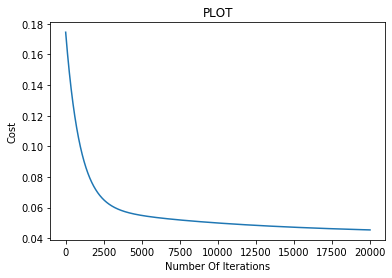


[Time Analysis]:
CPU times: user 2.4 s, sys: 44.5 ms, total: 2.44 s
Wall time: 1.45 s


In [91]:
%%time

# call function
num_iters = 20000
learning_rate = 0.0001
theta, cost = linearRegression(X_train, Y_train, learning_rate, num_iters)

# print thetas
print("[Theta Values]:\n ", theta)

# analyse error
print("[Error Analysis]:")
errorAnalysis(X_test, Y_test, theta)

# plot cost graph
cost = list(cost)
num_iterations = [x for x in range(1, num_iters+1)]
plt.plot(num_iterations, cost)
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost')
plt.title('PLOT')
plt.show()


print("\n[Time Analysis]:")

##### Step 7: Perform Linear Regression With Feature Scaling

In [92]:
# Function definitions
def zscoreFeatureScaling(X):
    # get standard deviation and mean
    std = np.std(X, axis = 0)
    std = np.tile(std,(X.shape[0],1))
    mean = np.mean(X,axis = 0)
    mean = np.tile(mean,(X.shape[0],1))

    # scale by subtracting mean and then dividing by std
    X_new = np.copy(X)
    X_new = np.subtract(X_new, mean)
    X_new = np.divide(X_new, std)

    return X_new


def minMaxFeatureScaling(X):
    # min array holds min of each column, max array holds max of each column
    min_array = np.min(X, axis = 0)
    min_array = np.tile(min_array, (X.shape[0],1))
    max_array = np.max(X, axis = 0)
    max_array = np.tile(max_array, (X.shape[0],1))
    
    # scale each element accordingly
    X_new = np.copy(X)
    X_new = np.subtract(X_new, min_array)
    X_new = np.divide(X_new, np.subtract(max_array, min_array))
    
    return X_new

def meanFeatureScaling(X):
    # min array holds min of each column, max array holds max of each column, similarly for mean
    min_array = np.min(X,axis = 0)
    min_array = np.tile(min_array,(X.shape[0],1))
    max_array = np.max(X,axis = 0)
    max_array = np.tile(max_array,(X.shape[0],1))
    mean = np.mean(X,axis = 0)
    mean = np.tile(mean,(X.shape[0],1))
    
    # scale each element accordingly
    X_new = np.copy(X)
    X_new = np.subtract(X_new, mean)
    X_new = np.divide(X_new, np.subtract(max_array, min_array))
    
    return X_new

[Error Analysis With Z-score Scaling]:
Mean Error =>  2.889738619697283
Mean square error =>  0.09720833241467011
Root Mean Square Error =>  0.31178250819228154
[Theta]:
 [[ 1.94173438e-01  6.37736637e-02  7.59638682e-02  7.30144740e-02
   7.35476976e-02  2.93545552e-02  2.06098352e-02  1.95434258e-02
   1.63530628e-02  4.24136800e-02  2.21121714e-02  2.58857743e-02
   3.91489705e-02  2.27828427e-02  3.71469031e-02  1.58242233e-02
   6.79046367e-03  6.39623332e-03  2.97785132e-03  1.04568223e-02
   2.43845721e-03  1.26110492e-03  7.72606777e-03  2.43258377e-05
   3.69822120e-03  2.68632564e-02  1.00380588e-02  1.39313688e-02
   8.83985337e-03  3.86273214e-03  1.17949376e-02  2.47362211e-02
   9.70073068e-03  8.83093006e-03  2.13736247e-02  9.57599090e-03
   1.76688257e-03  1.63706174e-03 -1.33611203e-03  2.68456918e-03
  -1.62341583e-03 -3.66043738e-03  6.30855033e-04 -4.28194671e-03
  -3.23297846e-03  6.00311670e-03 -3.68785039e-04 -7.84989834e-04
  -1.55788084e-03 -4.40672698e-03 -2.

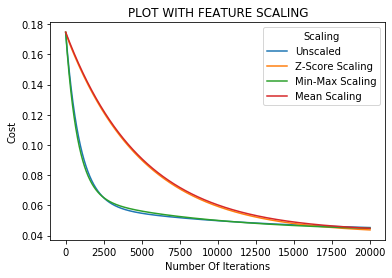


[Time Analysis]:
CPU times: user 9.66 s, sys: 191 ms, total: 9.85 s
Wall time: 8.47 s


In [93]:
%%time

# parameters
num_iters = 20000
learning_rate = 0.0001

# call functions
X_train_zscaled = zscoreFeatureScaling(X_train)
X_train_mmscaled = minMaxFeatureScaling(X_train)
X_train_meanscaled = meanFeatureScaling(X_train)
X_test_zscaled = zscoreFeatureScaling(X_test)
X_test_mmscaled = minMaxFeatureScaling(X_test)
X_test_meanscaled = meanFeatureScaling(X_test)

# plot cost graph without feature scaling 
theta, cost = linearRegression(X_train, Y_train, learning_rate, num_iters)
cost = list(cost)
num_iterations = [x for x in range(1, num_iters+1)]
plt.plot(num_iterations, cost)

# analyse error
print("[Error Analysis With Z-score Scaling]:")
errorAnalysis(X_test, Y_test, theta)
print('[Theta]:\n', theta)

# plot cost graph with zscore feature scaling
theta, cost = linearRegression(X_train_zscaled, Y_train, learning_rate, num_iters)
cost = list(cost)
plt.plot(num_iterations, cost)

# analyse error
print("\n\n[Error Analysis With Z-score Scaling]:")
errorAnalysis(X_test_zscaled, Y_test, theta)
print('[Theta]:\n', theta)


# plot cost graph with min max feature scaling 
theta, cost = linearRegression(X_train_mmscaled, Y_train, learning_rate, num_iters)
cost = list(cost)
plt.plot(num_iterations, cost)

# analyse error
print("\n\n[Error Analysis With MinMax Scaling]:")
errorAnalysis(X_test_mmscaled, Y_test, theta)
print('[Theta]:\n', theta)


# plot cost graph with mean feature scaling 
theta, cost = linearRegression(X_train_meanscaled, Y_train, learning_rate, num_iters)
cost = list(cost)
plt.plot(num_iterations, cost)

# analyse error
print("\n\n[Error Analysis With Mean Scaling]:")
errorAnalysis(X_test_meanscaled, Y_test, theta)
print('[Theta]:\n', theta)


# plot labels
plt.legend(['Unscaled','Z-Score Scaling','Min-Max Scaling','Mean Scaling'],loc = 'best', title = 'Scaling')
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost')
plt.title('PLOT WITH FEATURE SCALING')
plt.show()


print("\n[Time Analysis]:")

##### Step 8: Observe effect of varying $\alpha$ on the cost, '$J$'

[Minimum Costs]:
0.01  =>  0.038915079177293276
0.005  =>  0.03938492991686933
0.001  =>  0.040362165341450124
0.0005  =>  0.04071288416139701
0.0001  =>  0.0437954854884478
5e-05  =>  0.059346985593077994
1e-05  =>  0.12999385036681604
5e-06  =>  0.1496478424509231
1e-06  =>  0.1686685308082488


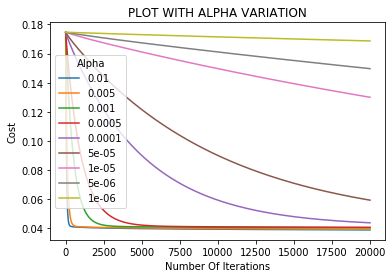


[Time Analysis]:
CPU times: user 21.6 s, sys: 350 ms, total: 22 s
Wall time: 15.4 s


In [94]:
%%time

num_iters = 20000

# generate learning rates
alphas = [1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6]
print('[Minimum Costs]:')

# perform linear regression and get costs for each alpha
for alpha in alphas:
    theta, cost = linearRegression(X_train_zscaled, Y_train, alpha, num_iters)
    cost = list(cost)
    
    # plot the costs
    num_iterations = [x for x in range(1, num_iters+1)]
    plt.plot(num_iterations, cost, label = alpha)
    plt.xlabel('Number Of Iterations')
    plt.ylabel('Cost')

    # print the final costs
    print(alpha, ' => ', cost[-1])
    
# plot the graphs
plt.legend(loc = 'best', title = 'Alpha')
plt.title('PLOT WITH ALPHA VARIATION')
plt.show()


print("\n[Time Analysis]:")

##### Step 9: Contour Plots To Show Effect Of Feature Scaling

In [83]:
def getErrors(X_train):
    # make a copy of theta to operate on 
    theta1 = theta

    # concatenate a 1s column to the start training data
    one_column = np.ones((X_train.shape[0], 1)) 
    X_t = np.concatenate((one_column, X_train), axis = 1)

    # get X and Y for 50 points between -50 and 50
    numPoints = 100
    t1 = np.linspace(-50,50,numPoints)
    t2 = np.linspace(-50,50,numPoints)
    X,Y = np.meshgrid(t1,t2)

    # For each point, find the error
    Z = np.ones(numPoints**2)
    for i in range(numPoints):
        for j in range(numPoints):
            # alter theta values and calculate new hypothesis
            theta1[0][0] = X[i][j]
            theta1[0][1] = Y[i][j]
            hyp = hypothesis(theta1, X_t)

            # calculate difference between predicted and actual, square of this and then divide by Y of this.
            hyp = hyp.flatten()
            diffarray = np.absolute(np.subtract(hyp, Y_train))
            diffsarray = np.square(diffarray)
            divarray = np.divide(diffarray, Y_train)
            error = np.average(divarray)
            
            # store error
            Z[numPoints*i+j] = error

    # reshape it into 50, 50
    Z = Z.reshape(numPoints,numPoints)
    return X,Y,Z

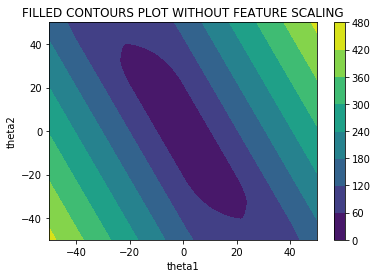

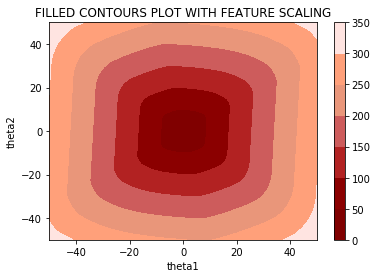


[Time Analysis]:
CPU times: user 2.12 s, sys: 46.3 ms, total: 2.17 s
Wall time: 1.73 s


In [95]:
%%time

# get points using the above function
X1,Y1,Z1 = getErrors(X_train)
X2,Y2,Z2 = getErrors(X_train_zscaled)

# plot first
cp = plt.contourf(X1, Y1, Z1)
plt.colorbar(cp)        # Add a colorbar to the plot
plt.title('FILLED CONTOURS PLOT WITHOUT FEATURE SCALING')
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.show()

# plot second
cp = plt.contourf(X2, Y2, Z2, colors=['maroon','darkred','firebrick','indianred','darksalmon','lightsalmon','mistyrose','linen'])
plt.colorbar(cp)        # Add a colorbar to the plot
plt.title('FILLED CONTOURS PLOT WITH FEATURE SCALING')
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.show()


print("\n[Time Analysis]:")

##### Step 10: Perform Linear Regression With Regularisation

In [85]:
def BGDWithRegularisation(theta, alpha, num_iters, h, X, y, n, lambd):
    # cost is a 1-D matrix of size num_iters, all originally 1s
    cost = np.ones(num_iters)

    # for each iteration
    for i in range(0, num_iters):
        # calculate gradient (differential) according to formula and update theta
        differential = np.subtract(y,np.dot(X, theta))  
        differential = np.dot(np.transpose(X), differential)
        differential = np.subtract(np.dot(lambd, theta), differential)
        theta = theta - (alpha/X.shape[0]) * differential
        
        # get new hypothesis and store cost for this iteration
        h = hypothesis(theta, X)
        temp = np.subtract(y,np.dot(X,theta))
        cost[i] = (1/X.shape[0]) * 0.5 * (np.add(np.sum(np.square(h-y)) ,lambd*np.dot(np.transpose(theta),theta)))
        
    # convert theta into 1 row and n+1 columns and return with cost
    theta = np.reshape(theta, (1, n+1))
    return theta, cost


In [86]:
def linearRegressionWithRegularisation(X, y, alpha, num_iters, lambd):
    # n is number of columns in X
    n = X.shape[1]
    
    # put a column of 1s at the start of X
    one_column = np.ones((X.shape[0], 1))
    X = np.concatenate((one_column, X), axis = 1)
    
    # initializing the parameter vector with 0s and calculate initial hypothesis
    theta = np.zeros(n+1)
    h = hypothesis(theta, X)
    
    # perform batch gradient descent and return theta and cost
    theta, cost = BGDWithRegularisation(theta, alpha, num_iters, h, X, y, n, lambd)
    return theta, cost

[Theta Values For Regression With Regularisation]:
  [[ 4.42513257e-01  8.35579226e-03  5.19184016e-03 -3.69871452e-03
   1.24982659e-02  3.90809939e-03  5.84730380e-03  4.83609576e-03
   4.03064782e-03  4.26311828e-03 -2.22232401e-03  7.76795158e-03
  -8.03733588e-04  4.30796178e-03  6.50790396e-03  1.33443803e-03
   7.73381485e-04  3.23000714e-03  2.49904965e-04  6.91887848e-03
   1.69631170e-03 -1.76089600e-03  3.47777095e-03 -6.70777137e-04
   4.76561970e-04 -1.50292531e-04  1.06271221e-03  9.37105100e-03
  -2.46947270e-03 -1.47325605e-03  5.38327997e-03  1.38160527e-03
   4.81860357e-03  2.56676934e-03  1.88427028e-03  8.41528907e-04
  -2.25791141e-03  1.64702515e-03 -4.85446201e-04  3.26886421e-03
   1.04226795e-03 -5.71497800e-03  2.68375245e-03 -3.00895993e-03
  -9.60254648e-04  4.58628936e-03  4.18801512e-03  5.91023333e-04
  -6.07273522e-04 -6.93755822e-03 -3.69439802e-03  3.44135421e-03
  -1.18545899e-03 -2.32622025e-03 -1.27721689e-03 -4.40365315e-03
  -5.00777957e-05  6.26

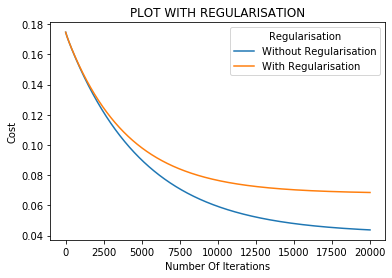


[Time Analysis]:
CPU times: user 5.66 s, sys: 114 ms, total: 5.77 s
Wall time: 3.82 s


In [87]:
%%time

# parameters
num_iters = 20000
learning_rate = 0.0001
lambd = 100

# call function for normal
theta, cost = linearRegression(X_train_zscaled, Y_train, learning_rate, num_iters)
print('[Theta Values For Regression With Regularisation]:\n ', theta)

# plot cost graph for normal
cost = list(cost)
num_iterations = [x for x in range(1, num_iters+1)]
plt.plot(num_iterations, cost, label = 'Without Regularisation')

# analyse error for normal
print("\n[Error Analysis Without Regularisation]:")
errorAnalysis(X_test_zscaled, Y_test, theta)

# call regularisation function
theta, cost = linearRegressionWithRegularisation(X_train_zscaled, Y_train, learning_rate, num_iters, lambd)
print('\n\n[Theta Values For Regression With Regularisation]:\n ', theta)
plt.plot(num_iterations, cost, label = 'With Regularisation')

# output:
print("\n[Error Analysis With Regularisation]:")
errorAnalysis(X_test_zscaled, Y_test, theta)

# plot labels
plt.legend(loc = 'best', title = 'Regularisation')
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost')
plt.title('PLOT WITH REGULARISATION')
plt.show()

print("\n[Time Analysis]:")

##### Step 11: Observe effect of varying $\lambda$ in Linear Regression With Regularisation

[Minimum Costs]:
100  =>  0.06856249847660068
10  =>  0.046741207412674256
1  =>  0.04409563087230182
0.1  =>  0.04382555678935202
0.01  =>  0.04379849318721098
0.001  =>  0.043795786264011864
0.0001  =>  0.043795515566061066
0  =>  0.0437954854884478


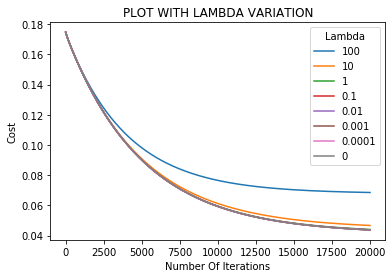


[Time Analysis]:
CPU times: user 24.7 s, sys: 382 ms, total: 25.1 s
Wall time: 15.9 s


In [88]:
%%time

# parameters
num_iters = 20000
learning_rate = 0.0001

# generate lambda values
lambdas = [100,10, 1, 1e-1, 1e-2, 1e-3, 1e-4,0]
print('[Minimum Costs]:')

# perform linear regression and get costs for each lambda
for lambda_var in lambdas:
    theta, cost = linearRegressionWithRegularisation(X_train_zscaled, Y_train, learning_rate, num_iters, lambda_var)
    cost = list(cost)
    
    # plot the costs
    num_iterations = [x for x in range(1, num_iters+1)]
    plt.plot(num_iterations, cost, label = lambda_var)
    plt.xlabel('Number Of Iterations')
    plt.ylabel('Cost')

    # print the final costs
    print(lambda_var, ' => ', cost[-1])
    
# plot the graphs
plt.legend(loc = 'best', title = 'Lambda')
plt.title('PLOT WITH LAMBDA VARIATION')
plt.show()

print("\n[Time Analysis]:")